In [1]:
## import module
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np



# 1)  Data Visualization

In [2]:
##load the data
data_train = pd.read_csv('kaggle/input/titanic/train.csv')
data_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Survival: Survival (0 = No; 1 = Yes)

Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Name : Name

Sex : Sex

Age : Age

Sibsp : Number of Siblings/Spouses Aboard

Parch : Number of Parents/Children Aboard

Ticket : Ticket Number

Fare : Passenger Fare

Cabin : Cabin Number

Embarked : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
pd.isnull(data_train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#set the color 
survived = sns.color_palette("husl", 8)[3] #green
died = sns.color_palette("husl",8)[0] #red

### 1.1) Visualize Ticket class Feature

<AxesSubplot:title={'center':'Number survived or died'}, xlabel='count', ylabel='Pclass'>

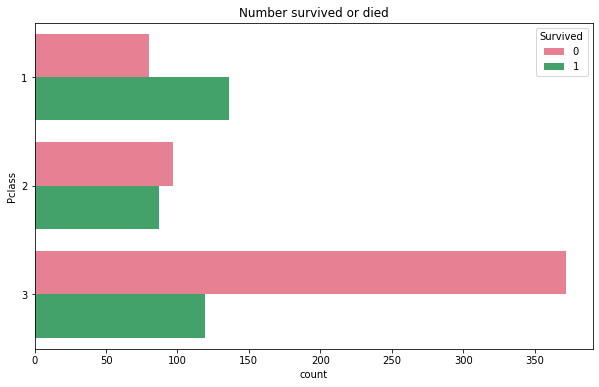

In [5]:
plt.figure(figsize = (10,6))
plt.title('Number survived or died')
plt.ylabel('Ticket class')
sns.countplot(data=data_train,y='Pclass',hue = 'Survived',palette={0:died, 1:survived})

In [6]:
print('Probabilty survived ')
print(data_train['Survived'][data_train['Pclass'] == 1 ].value_counts(normalize = True)*100)
print(data_train['Survived'][data_train['Pclass'] == 2 ].value_counts(normalize = True)*100)
print(data_train['Survived'][data_train['Pclass'] == 3 ].value_counts(normalize = True)*100)

Probabilty survived 
1    62.962963
0    37.037037
Name: Survived, dtype: float64
0    52.717391
1    47.282609
Name: Survived, dtype: float64
0    75.763747
1    24.236253
Name: Survived, dtype: float64


pclass: A proxy for socio-economic status (SES)
    -1st = Upper
    -2nd = Middle
    -3rd = Lower

from the plot we can see that lower ticket class more likely to died more than the first class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

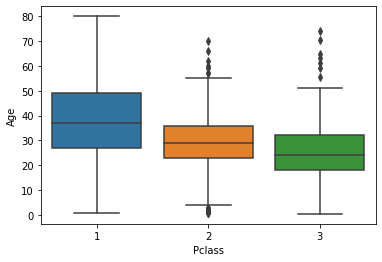

In [7]:
sns.boxplot(x='Pclass', y='Age', data=data_train)

we can see that the relation ticket class and age. the higher ticket class -> older 

In [8]:
print('Average Age of 1 st Ticket class ',data_train['Age'][data_train['Pclass'] == 1].mean())
print('Average Age of 2 nd Ticket class ',data_train['Age'][data_train['Pclass'] == 2].mean())
print('Average Age of 3 rd Ticket class ',data_train['Age'][data_train['Pclass'] == 3].mean())

Average Age of 1 st Ticket class  38.233440860215055
Average Age of 2 nd Ticket class  29.87763005780347
Average Age of 3 rd Ticket class  25.14061971830986


### 1.2) Visualize Sex Feature

<AxesSubplot:title={'center':'Number survived or died'}, xlabel='count', ylabel='Sex'>

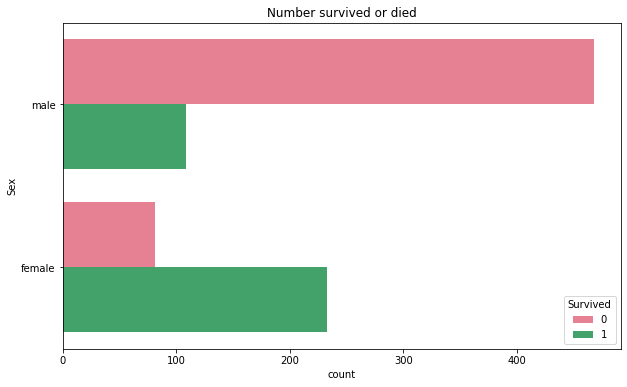

In [9]:
plt.figure(figsize = (10,6))
plt.title('Number survived or died')
plt.ylabel('Sex')
sns.countplot( data=data_train,y='Sex' ,hue = 'Survived', palette={0:died, 1:survived})

The number of male is more likely to died more than female

### 1.3) Visualize Age feature

<AxesSubplot:title={'center':'Number survived or died'}, xlabel='Count', ylabel='age'>

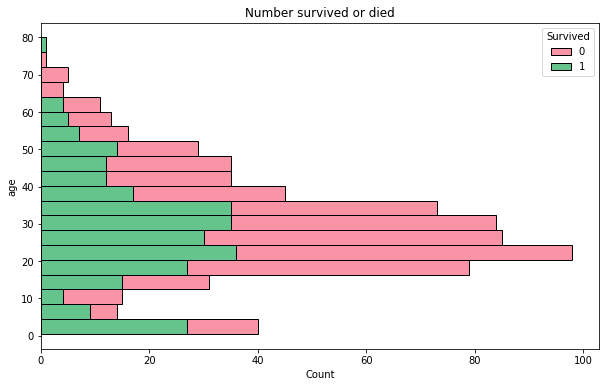

In [10]:
plt.figure(figsize = (10,6))
plt.title('Number survived or died')
plt.ylabel('age')
sns.histplot(data=data_train, y='Age', hue='Survived', multiple="stack",palette={0:died, 1:survived})

### 1.4) Visualize family size feature

In [11]:
data_train['Fam_size'] = data_train['SibSp'] + data_train['Parch'] +1 #family size 

<AxesSubplot:title={'center':'Number survived or died'}, xlabel='count', ylabel='Fam_size'>

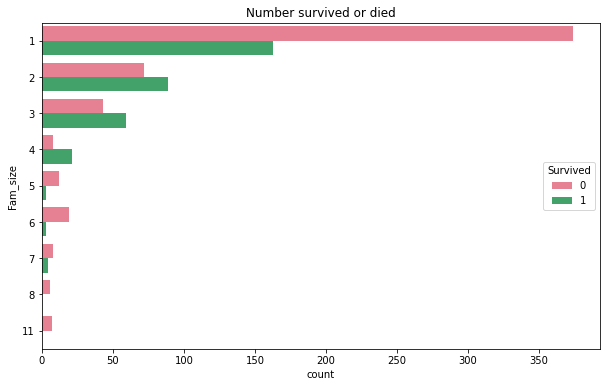

In [12]:
plt.figure(figsize = (10,6))
plt.title('Number survived or died')
plt.ylabel('family size')
sns.countplot(data=data_train,y='Fam_size' ,hue = 'Survived', palette={0:died, 1:survived})

So from the data we can see that 2-4 family size is survived more than alone 

let's look at the more deep into the family size 2-4

<AxesSubplot:title={'center':'Number survived or died'}, xlabel='count', ylabel='SibSp'>

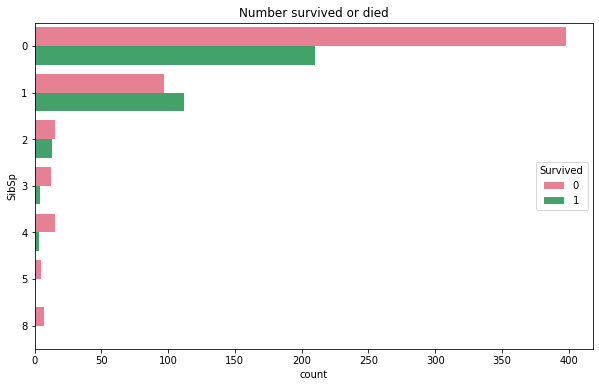

In [13]:
plt.figure(figsize = (10,6))
plt.title('Number survived or died')
plt.ylabel('sibsp')
sns.countplot(data=data_train,y='SibSp' ,hue = 'Survived', palette={0:died, 1:survived})

<AxesSubplot:title={'center':'Number survived or died'}, xlabel='count', ylabel='Parch'>

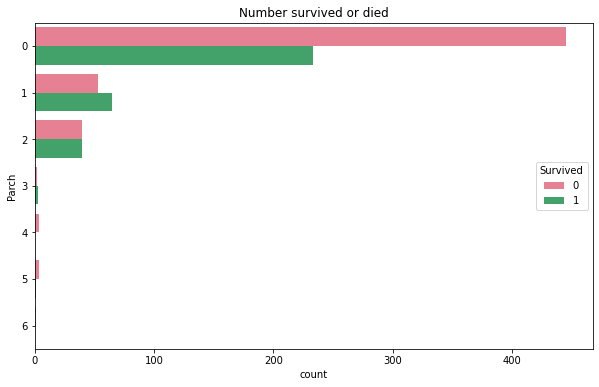

In [14]:
plt.figure(figsize = (10,6))
plt.title('Number survived or died')
plt.ylabel('parch')
sns.countplot(data=data_train,y='Parch' ,hue = 'Survived', palette={0:died, 1:survived})

### 1.5) Visualize Fare feature

<AxesSubplot:title={'center':'fare for each class'}, xlabel='Pclass', ylabel='Fare'>

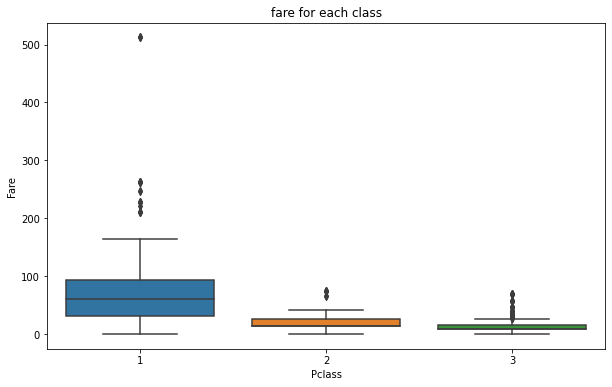

In [15]:
plt.figure(figsize = (10,6))
plt.title('fare for each class')
sns.boxplot(x='Pclass', y='Fare', data=data_train)

In [16]:
print('mean fare of 1 st ticket class = ', data_train['Fare'][data_train['Pclass']  == 1].mean())
print('mean fare of 2 nd ticket class = ', data_train['Fare'][data_train['Pclass']  == 2].mean())
print('mean fare of 3 rd ticket class = ', data_train['Fare'][data_train['Pclass']  == 3].mean())

mean fare of 1 st ticket class =  84.1546875
mean fare of 2 nd ticket class =  20.662183152173913
mean fare of 3 rd ticket class =  13.675550101832993


<AxesSubplot:title={'center':'Number survived or died'}, xlabel='Count', ylabel='fare'>

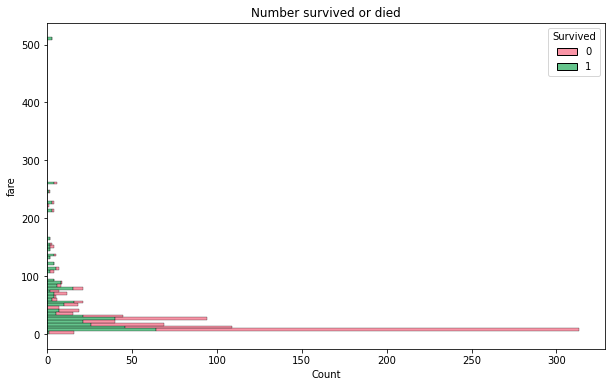

In [17]:
plt.figure(figsize = (10,6))
plt.title('Number survived or died')
plt.ylabel('fare')
sns.histplot(data=data_train, y='Fare', hue='Survived', multiple="stack",palette={0:died, 1:survived})

from the plot see that richer more likely to survived 

<AxesSubplot:title={'center':'fare for each class'}, xlabel='Sex', ylabel='Fare'>

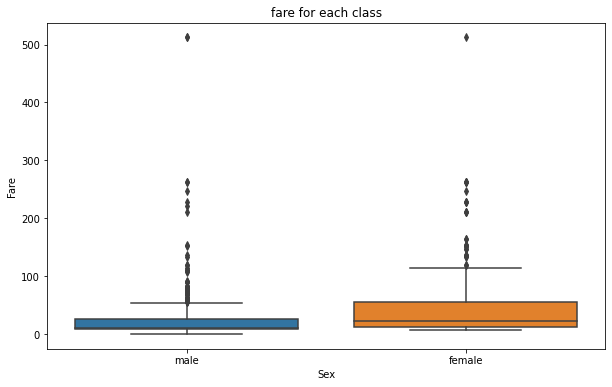

In [18]:
plt.figure(figsize = (10,6))
plt.title('fare for each class')
sns.boxplot(x='Sex', y='Fare', data=data_train)

In [19]:
print('fare male', data_train['Fare'][data_train['Sex']  == 'male'].mean())
print('fare female', data_train['Fare'][data_train['Sex']  == 'female'].mean())

fare male 25.523893414211443
fare female 44.47981783439491


the plot show that female more richer than the male and That might be the reason why female more likely to survived more than a male 

## 1.6) Visualize Embarked feature

<AxesSubplot:title={'center':'Number survived or died'}, xlabel='count', ylabel='Embarked'>

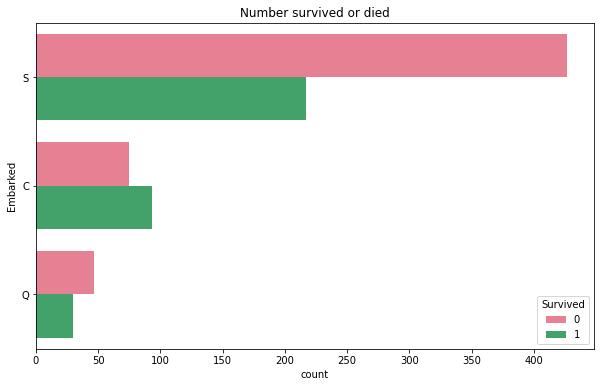

In [20]:
plt.figure(figsize = (10,6))
plt.title('Number survived or died')
plt.ylabel('Embarked')
sns.countplot(data=data_train,y='Embarked' ,hue = 'Survived', palette={0:died, 1:survived})

<AxesSubplot:title={'center':'fare for each Embarked'}, xlabel='Embarked', ylabel='Fare'>

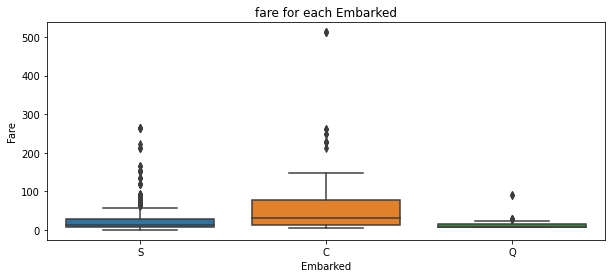

In [21]:
plt.figure(figsize = (10,4))
plt.title('fare for each Embarked')
sns.boxplot(x='Embarked', y='Fare', data=data_train)

# 2) Data preprocessing

### 2.1) Feature Selection

In [22]:
data_train = data_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

### 2.2) Data cleaning 

<AxesSubplot:>

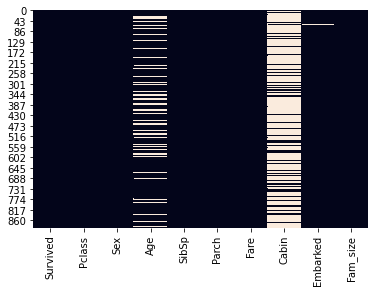

In [23]:
sns.heatmap(data_train.isnull(), cbar=False)

In [24]:
data_train = data_train.drop('Cabin',axis=1)

<AxesSubplot:>

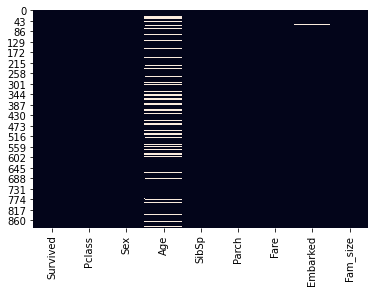

In [25]:
sns.heatmap(data_train.isnull(), cbar=False)

In [26]:
print('Average Age of 1 st Ticket class ',data_train['Age'][data_train['Pclass'] == 1].mean())
print('Average Age of 2 nd Ticket class ',data_train['Age'][data_train['Pclass'] == 2].mean())
print('Average Age of 3 rd Ticket class ',data_train['Age'][data_train['Pclass'] == 3].mean())

Average Age of 1 st Ticket class  38.233440860215055
Average Age of 2 nd Ticket class  29.87763005780347
Average Age of 3 rd Ticket class  25.14061971830986


In [27]:
def impute_age(col):
    
    age = col[0]
    
    pclass = col[1]
    
    if pd.isnull(age):
        
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        elif pclass == 3:
            return 25
        
    else:
        return age

    
data_train['Age'] = data_train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

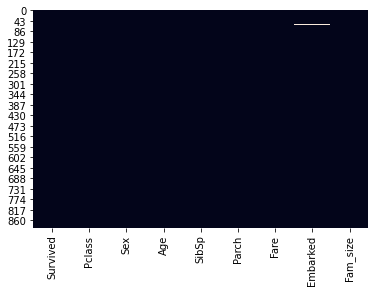

In [28]:
sns.heatmap(data_train.isnull(), cbar=False)

In [29]:
data_train['Embarked'].fillna('S', inplace=True) #mode

In [30]:
data_train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
Fam_size    False
dtype: bool

## 1.3) Encoding categorical features

In [31]:
data_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fam_size
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


In [32]:
def encode_sex(col):
    if col == 'male':
        return 1
    else:
        return 0
data_train['Sex'] = data_train['Sex'].apply(encode_sex)

In [33]:
data_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fam_size
0,0,3,1,22.0,1,0,7.2500,S,2
1,1,1,0,38.0,1,0,71.2833,C,2
2,1,3,0,26.0,0,0,7.9250,S,1
3,1,1,0,35.0,1,0,53.1000,S,2
4,0,3,1,35.0,0,0,8.0500,S,1


In [34]:
Embark_encoded = pd.get_dummies(data_train['Embarked'],prefix = 'Embarked_')
data_train = pd.concat([data_train,Embark_encoded],axis = 1)
data_train_encoded = data_train.drop('Embarked',axis=1) 

In [35]:
data_train_encoded.dtypes

Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Fam_size         int64
Embarked__C      uint8
Embarked__Q      uint8
Embarked__S      uint8
dtype: object

In [36]:
from sklearn.model_selection import train_test_split


X = data_train_encoded.drop('Survived',axis =1)
y = data_train_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.8, test_size=0.2,
                                                                random_state=0)


In [37]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter =1000,random_state=0)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_valid)


In [38]:
from sklearn.metrics import classification_report ,accuracy_score

accuracy_score(y_valid, y_pred, normalize=True)

0.8100558659217877

In [39]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       110
           1       0.77      0.72      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [40]:
test_data = pd.read_csv('kaggle/input/titanic/test.csv')
index = test_data['PassengerId']
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
test_data = test_data.drop('Cabin',axis=1)

In [42]:
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test_data['Age'] = test_data[['Age','Pclass']].apply(impute_age,axis=1)
test_data['Embarked'].fillna('S', inplace=True)
test_data['Fam_size'] = test_data['Parch'] + test_data['SibSp'] + 1
test_data['Sex'] = test_data['Sex'].apply(encode_sex)
Embark_encoded = pd.get_dummies(test_data['Embarked'],prefix = 'Embarked_')
test_data = pd.concat([test_data,Embark_encoded],axis = 1)
test_data_encoded = test_data.drop('Embarked',axis=1)


In [43]:
test_data_encoded

,Pclass,Sex,Age,SibSp,Parch,Fare,Fam_size,Embarked__C,Embarked__Q,Embarked__S
0,3,1,34.5,0,0,7.8292,1,0,1,0
1,3,0,47.0,1,0,7.0000,2,0,0,1
2,2,1,62.0,0,0,9.6875,1,0,1,0
3,3,1,27.0,0,0,8.6625,1,0,0,1
4,3,0,22.0,1,1,12.2875,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,1,25.0,0,0,8.0500,1,0,0,1
414,1,0,39.0,0,0,108.9000,1,1,0,0
415,3,1,38.5,0,0,7.2500,1,0,0,1
416,3,1,25.0,0,0,8.0500,1,0,0,1


In [44]:
test_data_encoded.dtypes

Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Fam_size         int64
Embarked__C      uint8
Embarked__Q      uint8
Embarked__S      uint8
dtype: object

In [45]:
test_data_encoded.isnull().any()

Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare            True
Fam_size       False
Embarked__C    False
Embarked__Q    False
Embarked__S    False
dtype: bool

In [46]:
test_data_encoded['Fare'] = test_data_encoded['Fare'].fillna(test_data_encoded['Fare'].mean())

In [47]:
test_data_encoded.isnull().any()

Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Fam_size       False
Embarked__C    False
Embarked__Q    False
Embarked__S    False
dtype: bool

In [48]:
result = clf.predict(test_data_encoded)

In [49]:
out = pd.DataFrame({'Survived':result}, index=index)

In [50]:
out.to_csv('/home/napas/Desktop/out.csv')